In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import datetime
import warnings
import pickle
from itertools import compress
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
from model_generator_timeseries import *

### Generate df

In [4]:
paths_dict_band = json.load(open('json/paths_dict_band.json', 'r'))

In [8]:
band = generate_df(paths_dict_band, 'band', '2017-05-01')

In [9]:
df = band.return_completed_df()

In [11]:
name_list_24 = ['band']

In [12]:
feature_eng_df = band.return_df_feature_engineering(name_list_24)

In [13]:
features_list = json.load(open('json/feature_list_band.json', 'r'))

In [14]:
len(features_list)

85

### Load out-of-sample predictions

In [15]:
lgbm_predictions = pd.read_json('predictions/lgbm_predictions.json', orient='records')
rf_predictions = pd.read_json('predictions/rf_predictions.json', orient='records')
knn_predictions = pd.read_json('predictions/knn_predictions.json', orient='records')
for df in [lgbm_predictions, rf_predictions, knn_predictions]:
    df.index.name = 'date_hour'

In [16]:
lgbm_predictions

,error,y_pred,y_true
date_hour,,,
2016-01-31 00:00:00,7.343949,19.956051,27.30
2016-01-31 01:00:00,7.015639,25.984361,33.00
2016-01-31 02:00:00,-0.528155,31.438155,30.91
2016-01-31 03:00:00,-0.131629,33.131629,33.00
2016-01-31 04:00:00,-8.843400,35.313400,26.47
2016-01-31 05:00:00,-10.131335,35.181335,25.05
2016-01-31 06:00:00,-10.109635,33.479635,23.37
2016-01-31 07:00:00,-8.154757,33.114757,24.96
2016-01-31 08:00:00,-20.905247,41.165247,20.26


### Train model timeseries based

In [17]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
pipeline = LGBMRegressor(num_leaves=40, learning_rate=0.02, n_estimators=1000)

In [18]:
lgbm_model_no_rolling = timeseries_model(feature_eng_df, features_list, 'band', 
                             '2016-01-01', '2017-04-30', 30, pipeline, '2017-03-18', rolling=False)

In [19]:
lgbm_model_no_rolling.obtain_cv_scores()

Acting on fold 10
Acting on fold 20
Acting on fold 30
Acting on fold 40
Mean absolute error: 2.9857 +- 3.7639
Mean squared error: 17.0848 +- 68.2640


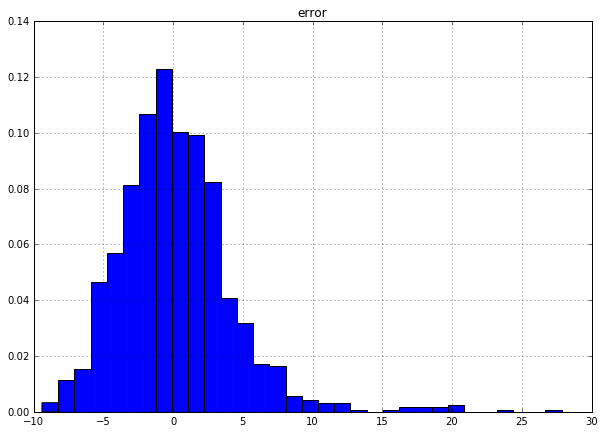

In [20]:
lgbm_model_no_rolling.plot_histogram_error()

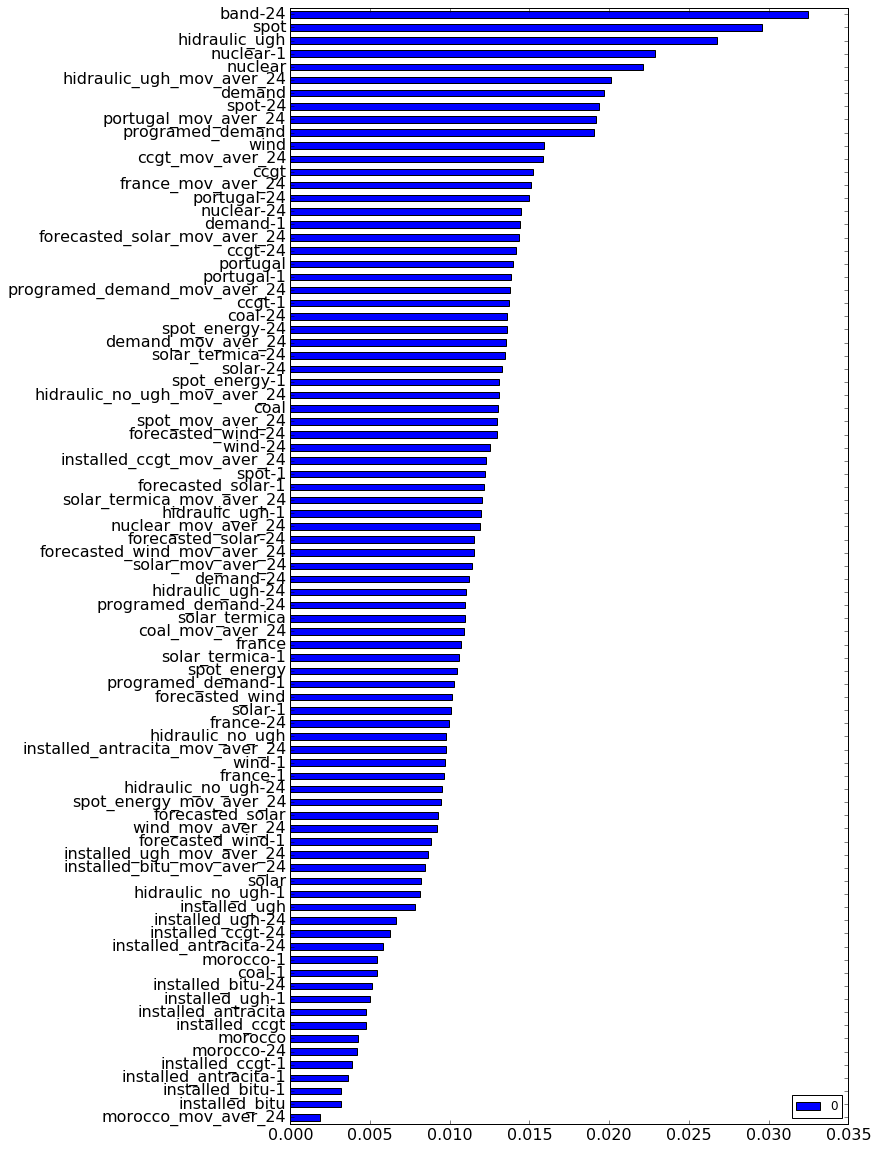

In [21]:
lgbm_model_no_rolling.get_feature_importance()

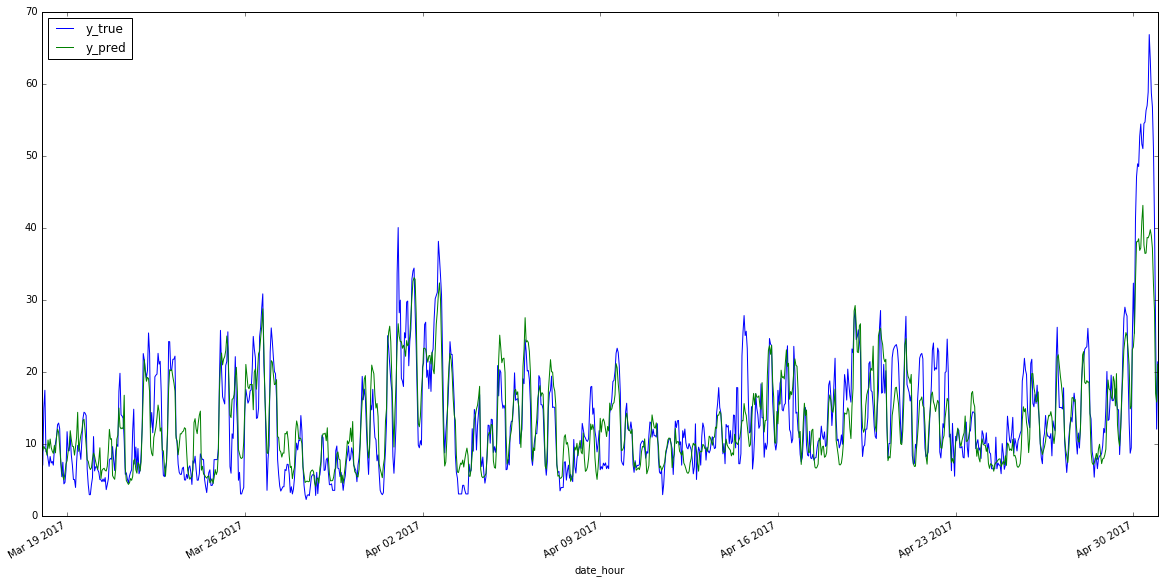

In [22]:
lgbm_model_no_rolling.result_df[['y_true', 'y_pred']].plot(figsize=(20,10));

In [23]:
lgbm_model_no_rolling.result_df[lgbm_model_no_rolling.result_df['y_pred'] > 0]

,y_pred,y_true,error
date_hour,,,
2017-03-18 00:00:00,8.205416,8.00,-0.205416
2017-03-18 01:00:00,9.021249,7.00,-2.021249
2017-03-18 02:00:00,9.633605,14.91,5.276395
2017-03-18 03:00:00,9.285941,17.40,8.114059
2017-03-18 04:00:00,9.263980,8.85,-0.413980
2017-03-18 05:00:00,8.388787,8.85,0.461213
2017-03-18 06:00:00,10.489251,7.79,-2.699251
2017-03-18 07:00:00,9.329253,6.83,-2.499253
2017-03-18 08:00:00,10.626115,8.20,-2.426115


In [26]:
rf_pipeline = make_pipeline(Imputer(strategy='median'),
                          RandomForestRegressor(n_estimators=100, max_depth=9, 
                                                max_features='sqrt', max_leaf_nodes=200, 
                                                n_jobs=-1, random_state=0, min_samples_split=80,
                                               min_samples_leaf=25))

In [27]:
rf_model_no_rolling = timeseries_model(feature_eng_df, features_list, 'band', 
                             '2016-01-01', '2017-04-30', 30, rf_pipeline, '2017-03-18', rolling=False)

In [28]:
rf_model_no_rolling.obtain_cv_scores()

Acting on fold 10
Acting on fold 20
Acting on fold 30
Acting on fold 40
Mean absolute error: 3.6876 +- 5.5360
Mean squared error: 27.8386 +- 140.3898


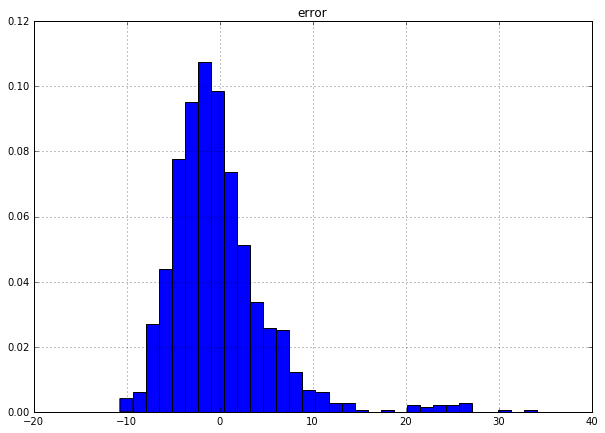

In [29]:
rf_model_no_rolling.plot_histogram_error()

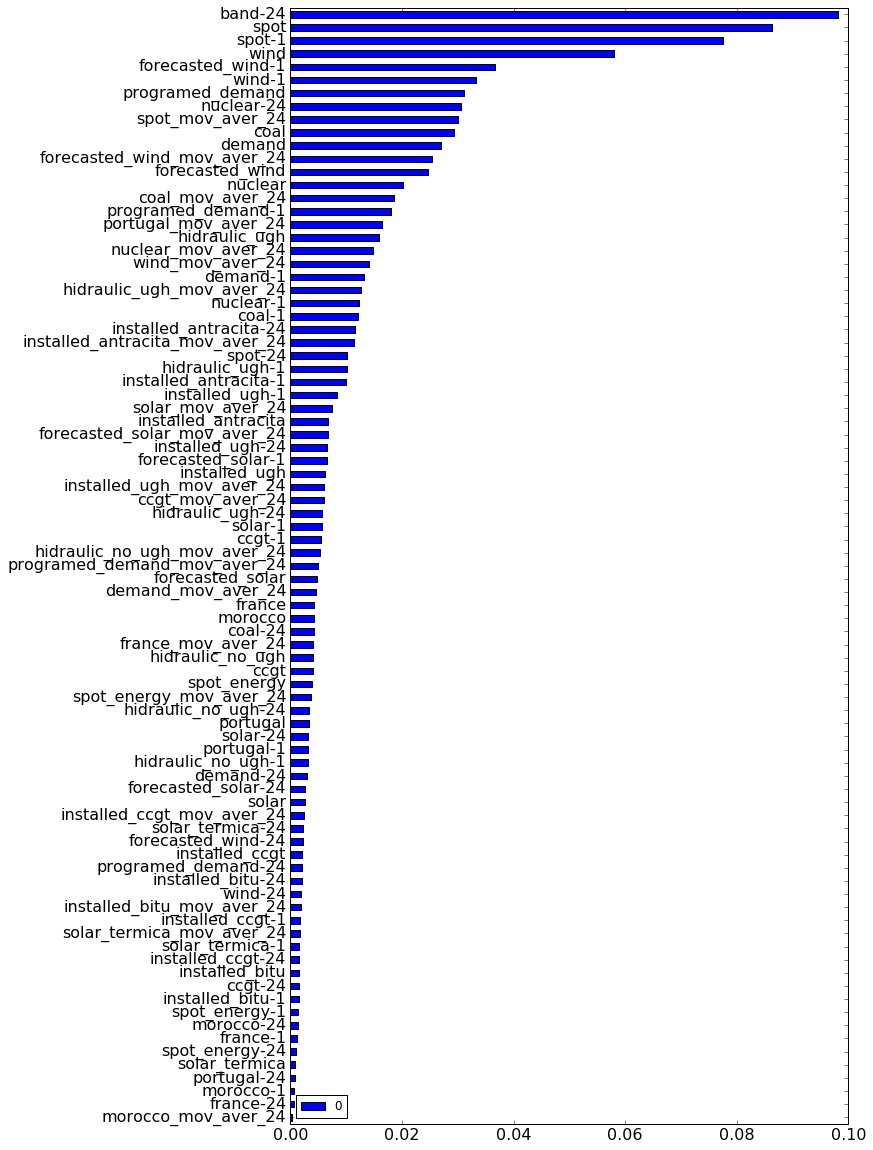

In [30]:
rf_model_no_rolling.get_feature_importance()

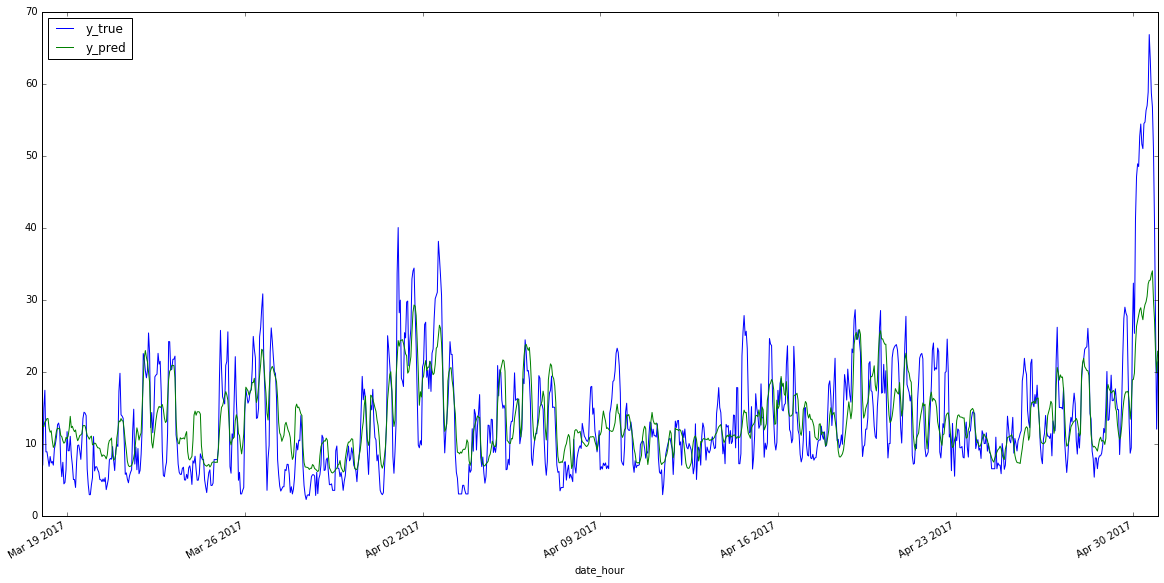

In [31]:
rf_model_no_rolling.result_df[['y_true','y_pred']].plot(figsize=(20,10));

In [35]:
knn_pipeline = make_pipeline(Imputer(strategy='median'),StandardScaler(),
                                  KNeighborsRegressor(n_neighbors=20, weights='distance', 
                                                      leaf_size=30,p=2, n_jobs=-1))

In [36]:
knn_model_no_rolling = timeseries_model(feature_eng_df, features_list, 'band', 
                             '2016-01-01', '2017-04-30', 30, knn_pipeline, '2017-03-18', rolling=False)

In [37]:
knn_model_no_rolling.obtain_cv_scores()

Acting on fold 10
Acting on fold 20
Acting on fold 30
Acting on fold 40
Mean absolute error: 4.0916 +- 7.7160
Mean squared error: 41.8374 +- 245.8168


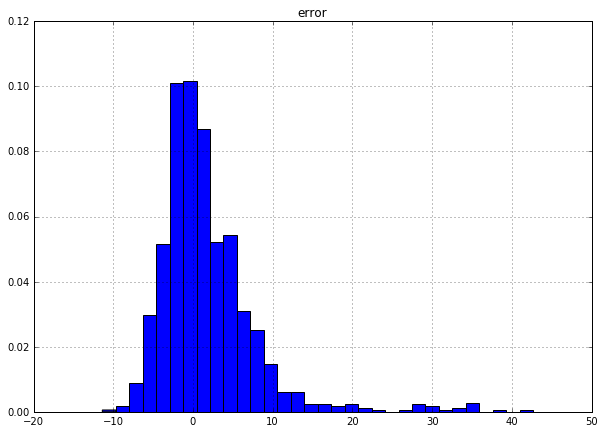

In [38]:
knn_model_no_rolling.plot_histogram_error()

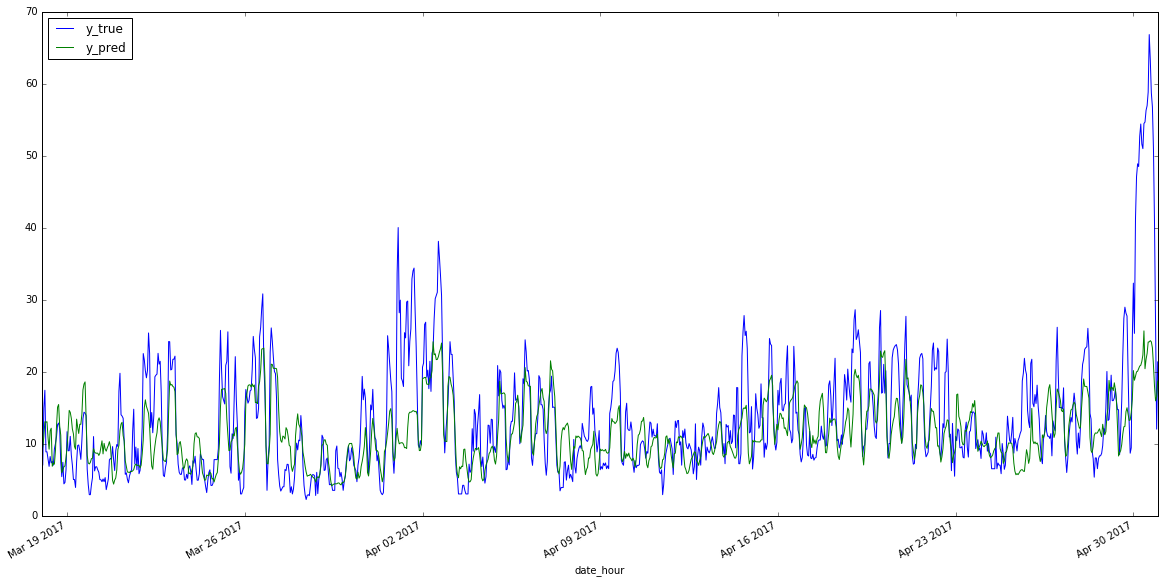

In [39]:
knn_model_no_rolling.result_df[['y_true', 'y_pred']].plot(figsize=(20,10));

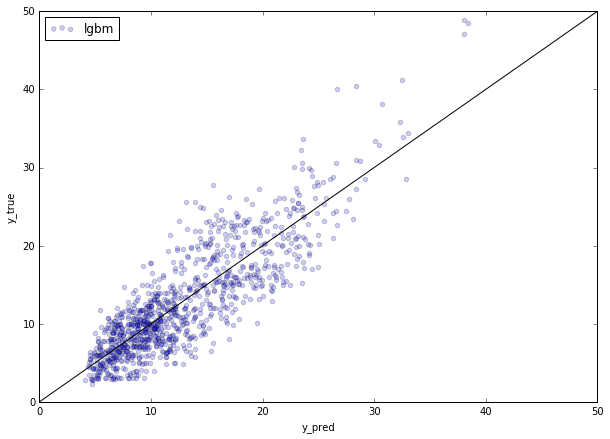

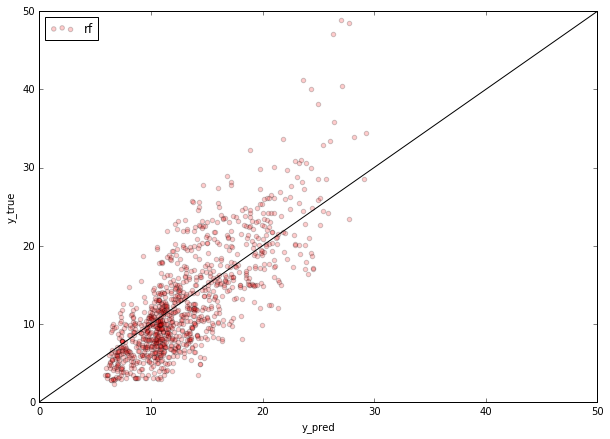

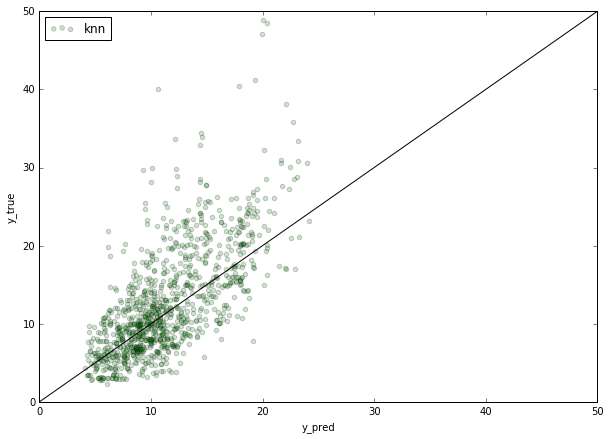

In [40]:
for name, color, df in zip(['lgbm','rf','knn'],['blue','red','green'],
                           [lgbm_model_no_rolling, rf_model_no_rolling, knn_model_no_rolling]):
    fig, ax = plt.subplots(1,1, figsize=(10,7))
    df.result_df[['y_pred', 'y_true']].plot.scatter(x='y_pred', y='y_true', alpha=0.2, ax=ax, label=name, color=color)
    ax.plot(np.arange(55), np.arange(55), color='black')
    ax.set_xlim([0,50])
    ax.set_ylim([0,50]);

### Update predictions

In [54]:
lgbm_predictions = pd.concat([lgbm_predictions, lgbm_model_no_rolling.result_df[lgbm_model_no_rolling.result_df.index.date > lgbm_predictions.index.date[-1]]])
rf_predictions = pd.concat([rf_predictions, rf_model_no_rolling.result_df[rf_model_no_rolling.result_df.index.date > rf_predictions.index.date[-1]]])
knn_predictions = pd.concat([knn_predictions, knn_model_no_rolling.result_df[knn_model_no_rolling.result_df.index.date > knn_predictions.index.date[-1]]])

Export predictions

In [57]:
lgbm_predictions.to_json('predictions/lgbm_predictions.json')
rf_predictions.to_json('predictions/rf_predictions.json')
knn_predictions.to_json('predictions/knn_predictions.json')

Export models

In [58]:
with open('saved_models/lgbm_pipeline.p', 'wb') as f:
    pickle.dump(lgbm_model_no_rolling.pipeline, f)
    
with open('saved_models/rf_pipeline.p', 'wb') as f:
    pickle.dump(rf_model_no_rolling.pipeline, f)
    
with open('saved_models/knn_pipeline.p', 'wb') as f:
    pickle.dump(knn_model_no_rolling.pipeline, f)